<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/1-intro-to-linear-algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Linear Algebra

This topic, *Intro to Linear Algebra*, is the first in the *Machine Learning Foundations* series. 

It is essential because linear algebra lies at the heart of most machine learning approaches and is especially predominant in deep learning, the branch of ML at the forefront of today’s artificial intelligence advances. Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces, thereby enabling machines to recognize patterns and make predictions. 

The content covered in *Intro to Linear Algebra* is itself foundational for all the other topics in the Machine Learning Foundations series and it is especially relevant to *Linear Algebra II*.

Over the course of studying this topic, you'll: 

* Understand the fundamentals of linear algebra, a ubiquitous approach for solving for unknowns within high-dimensional spaces. 

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning. 
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms. 

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Data Structures for Algebra*

* What Linear Algebra Is  
* A Brief History of Algebra 
* Tensors 
* Scalars 
* Vectors and Vector Transposition
* Norms and Unit Vectors
* Basis, Orthogonal, and Orthonormal Vectors
* Arrays in NumPy  
* Matrices 
* Tensors in TensorFlow and PyTorch

*Segment 2: Common Tensor Operations* 

* Tensor Transposition
* Basic Tensor Arithmetic
* Reduction
* The Dot Product
* Solving Linear Systems

*Segment 3: Matrix Properties*

* The Frobenius Norm
* Matrix Multiplication
* Symmetric and Identity Matrices
* Matrix Inversion
* Diagonal Matrices
* Orthogonal Matrices


## Segment 1: Data Structures for Algebra

**Slides used to begin segment, with focus on introducing what linear algebra is, including hands-on paper and pencil exercises.**

### What Linear Algebra Is

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0, 40, 1000) # start, finish, n points

Distance travelled by robber: $d = 2.5t$

In [4]:
d_r = 2.5 * t 

Distance travelled by sheriff: $d = 3(t-5)$

In [5]:
d_s = 3 * (t-5)

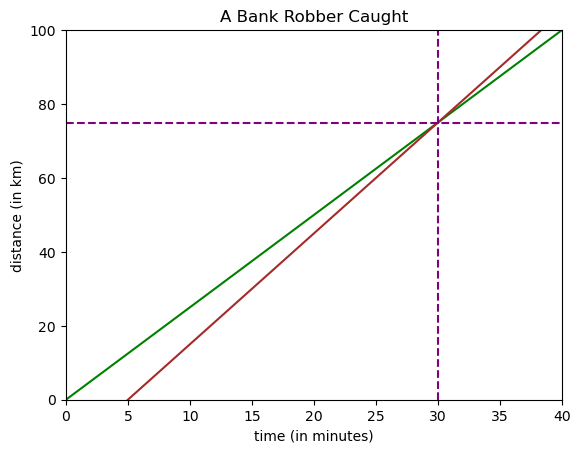

In [6]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

**Return to slides here.**

### Scalars (Rank 0 Tensors) in Base Python

In [7]:
x = 25
x

25

In [8]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [9]:
y = 3

In [10]:
py_sum = x + y
py_sum

28

In [11]:
type(py_sum)

int

In [12]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [190]:
type(x_float)

float

In [13]:
type(float_sum)

float

### Scalars in PyTorch

* PyTorch and TensorFlow are the two most popular *automatic differentiation* libraries (a focus of the [*Calculus I*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/3-calculus-i.ipynb) and [*Calculus II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb) subjects in the *ML Foundations* series) in Python, itself the most popular programming language in ML
* PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays
* The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) for example) 
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html)

In [14]:
import torch

In [191]:
x_pt = torch.tensor(25, dtype=torch.float16) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(25., dtype=torch.float16)

In [192]:
x_pt.shape

torch.Size([])

### Scalars in TensorFlow (version 2.0 or later)

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here. 

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [17]:
import tensorflow as tf

In [18]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [19]:
x_tf.shape

TensorShape([])

In [20]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [21]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [22]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [23]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

28

In [24]:
type(tf_sum.numpy())

numpy.int16

In [25]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

In [26]:
tf_float.dtype

tf.float16

**Return to slides here.**

### Vectors (Rank 1 Tensors) in NumPy

In [27]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [28]:
len(x)

3

In [29]:
x.shape

(3,)

In [30]:
type(x)

numpy.ndarray

In [31]:
x[0] # zero-indexed

25

In [32]:
type(x[0])

numpy.int32

### Vector Transposition

In [33]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [34]:
x_t.shape

(3,)

In [35]:
# ...but it does we use nested "matrix-style" brackets: 
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [36]:
y.shape

(1, 3)

In [37]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent: 
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [38]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [39]:
# Column vector can be transposed back to original row vector: 
y_t.T 

array([[25,  2,  5]])

In [40]:
y_t.T.shape

(1, 3)

### Zero Vectors

Have no effect if added to another vector

In [41]:
z = np.zeros(3) 
z

array([0., 0., 0.])

### Vectors in PyTorch and TensorFlow

In [42]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [43]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

**Return to slides here.**

### $L^2$ Norm

In [44]:
x

array([25,  2,  5])

In [45]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [46]:
np.linalg.norm(x)

25.573423705088842

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

**Return to slides here.**

### $L^1$ Norm

In [47]:
x

array([25,  2,  5])

In [48]:
np.abs(25) + np.abs(2) + np.abs(5)

32

**Return to slides here.**

### Squared $L^2$ Norm

In [49]:
x

array([25,  2,  5])

In [50]:
(25**2 + 2**2 + 5**2)

654

In [51]:
# we'll cover tensor multiplication more soon but to prove point quickly: 
np.dot(x, x)

654

**Return to slides here.**

### Max Norm

In [52]:
x

array([25,  2,  5])

In [53]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

**Return to slides here.**

### Orthogonal Vectors

In [54]:
i = np.array([1, 0])
i

array([1, 0])

In [55]:
j = np.array([0, 1])
j

array([0, 1])

In [56]:
np.dot(i, j) # detail on the dot operation coming up...

0

**Return to slides here.**

### Matrices (Rank 2 Tensors) in NumPy

In [57]:
# Use array() with nested brackets: 
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [58]:
X.shape

(3, 2)

In [59]:
X.size

6

In [60]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [61]:
# Select middle row of matrix X: 
X[1,:]

array([ 5, 26])

In [62]:
# Another slicing-by-index example: 
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

### Matrices in PyTorch

In [63]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [64]:
X_pt.shape # more pythonic

torch.Size([3, 2])

In [65]:
X_pt[1,:]

tensor([ 5, 26])

### Matrices in TensorFlow

In [66]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

In [67]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [68]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2])>

In [69]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26])>

**Return to slides here.**

### Higher-Rank Tensors

As an example, rank 4 tensors are common for images, where each dimension corresponds to: 

1. Number of images in training batch, e.g., 32
2. Image height in pixels, e.g., 28 for [MNIST digits](http://yann.lecun.com/exdb/mnist/)
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [70]:
images_pt = torch.zeros([32, 28, 28, 3])

In [71]:
# images_pt

In [72]:
images_tf = tf.zeros([32, 28, 28, 3])

In [73]:
# images_tf

**Return to slides here.**

## Segment 2: Common Tensor Operations

### Tensor Transposition

In [74]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [75]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [76]:
X_pt.T 

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [77]:
tf.transpose(X_tf) # less Pythonic

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]])>

### Basic Arithmetical Properties

Adding or multiplying with scalar applies operation to all elements and tensor shape is retained: 

In [78]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [79]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [80]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [81]:
X_pt*2+2 # Python operators are overloaded; could alternatively use torch.mul() or torch.add()

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [82]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [83]:
X_tf*2+2 # Operators likewise overloaded; could equally use tf.multiply() tf.add()

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

In [84]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

If two tensors have the same size, operations are often by default applied element-wise. This is **not matrix multiplication**, which we'll cover later, but is rather called the **Hadamard product** or simply the **element-wise product**. 

The mathematical notation is $A \odot X$

In [85]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [86]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [87]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [88]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [89]:
A_pt = X_pt + 2

In [90]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [91]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [92]:
A_tf = X_tf + 2

In [93]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

In [94]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]])>

### Reduction

Calculating the sum across all elements of a tensor is a common operation. For example: 

* For vector ***x*** of length *n*, we calculate $\sum_{i=1}^{n} x_i$
* For matrix ***X*** with *m* by *n* dimensions, we calculate $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [95]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [96]:
X.sum()

68

In [97]:
torch.sum(X_pt)

tensor(68)

In [98]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [99]:
# Can also be done along one specific axis alone, e.g.:
X.sum(axis=0) # summing over all rows

array([33, 35])

In [100]:
X.sum(axis=1) # summing over all columns

array([27, 31, 10])

In [101]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [102]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10])>

Many other operations can be applied with reduction along all or a selection of axes, e.g.:

* maximum
* minimum
* mean
* product

They're fairly straightforward and used less often than summation, so you're welcome to look them up in library docs if you ever need them.

### The Dot Product

If we have two vectors (say, ***x*** and ***y***) with the same length *n*, we can calculate the dot product between them. This is annotated several different ways, including the following: 

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$

Regardless which notation you use (I prefer the first), the calculation is the same; we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is, $x \cdot y = \sum_{i=1}^{n} x_i y_i$

The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

In [103]:
x

array([25,  2,  5])

In [104]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [105]:
25*0 + 2*1 + 5*2

12

In [106]:
np.dot(x, y)

12

In [107]:
x_pt

tensor([25,  2,  5])

In [108]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [109]:
np.dot(x_pt, y_pt)

12

In [110]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [111]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

In [112]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2])>

In [113]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

**Return to slides here.**

### Solving Linear Systems

In the **Substitution** example, the two equations in the system are: 
$$ y = 3x $$
$$ -5x + 2y = 2 $$

The second equation can be rearranged to isolate $y$: 
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [114]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

In [115]:
y1 = 3 * x

In [116]:
y2 = 1 + (5*x)/2

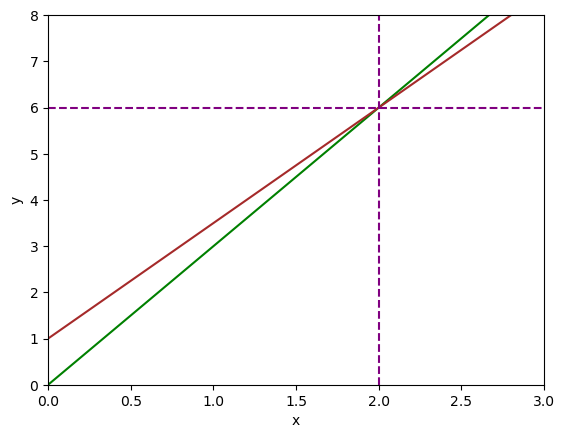

In [117]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

In the **Elimination** example, the two equations in the system are:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

Both equations can be rearranged to isolate $y$. Starting with the first equation: 
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Then for the second equation: 
$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [118]:
y1 = -5 + (2*x)/3

In [119]:
y2 = (7-2*x)/5

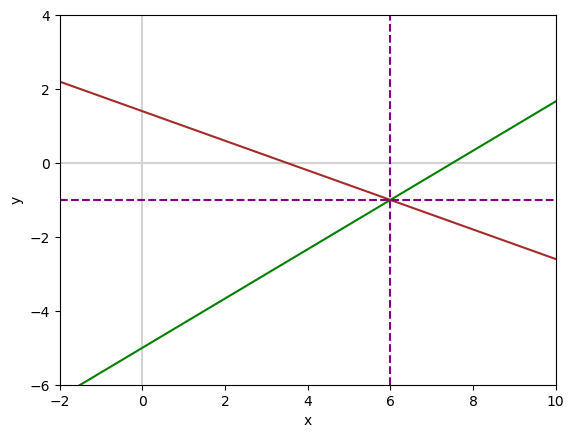

In [120]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Add x and y axes: 
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')

## Segment 3: Matrix Properties

### Frobenius Norm

In [121]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [122]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [123]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

In [124]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() supports floats only

In [125]:
torch.norm(X_pt)

tensor(5.4772)

In [126]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() also supports floats only

In [127]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

**Return to slides here.**

### Matrix Multiplication (with a Vector)

In [128]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [129]:
b = np.array([1, 2])
b

array([1, 2])

In [130]:
np.dot(A, b) # even though technically dot products are between vectors only

array([11, 17, 23])

In [131]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [132]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [133]:
torch.matmul(A_pt, b_pt) # like np.dot(), automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([11, 17, 23])

In [134]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]])>

In [135]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2])>

In [136]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23])>

**Return to slides here.**

### Matrix Multiplication (with Two Matrices)

In [137]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [138]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [139]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Note that matrix multiplication is not "commutative" (i.e., $AB \neq BA$) so uncommenting the following line will throw a size mismatch error:

In [140]:
# np.dot(B, A)

In [141]:
B_pt = torch.from_numpy(B) # much cleaner than TF conversion
B_pt

tensor([[1, 9],
        [2, 0]], dtype=torch.int32)

In [142]:
# another neat way to create the same tensor with transposition: 
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [143]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike in TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [144]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]])>

In [145]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]])>

**Return to slides here.**

### Symmetric Matrices

In [146]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [147]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [148]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

**Return to slides here.**

### Identity Matrices

In [149]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [150]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [151]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

**Return to slides here.**

### Answers to Matrix Multiplication Qs

In [152]:
M_q = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
M_q

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [153]:
V_q = torch.tensor([[-1, 1, -2], [0, 1, 2]]).T
V_q

tensor([[-1,  0],
        [ 1,  1],
        [-2,  2]])

In [154]:
torch.matmul(M_q, V_q)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

### Matrix Inversion

In [155]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [156]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

As a quick aside, let's prove that $X^{-1}X = I_n$ as per the slides: 

In [157]:
np.dot(Xinv, X)

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

...and now back to solving for the unknowns in $w$: 

In [158]:
y = np.array([4, -7])
y

array([ 4, -7])

In [159]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [160]:
np.dot(X, w)

array([ 4., -7.])

**Geometric Visualization**

Recalling from the slides that the two equations in the system are:
$$ 4b + 2c = 4 $$
$$ -5b - 3c = -7 $$

Both equations can be rearranged to isolate a variable, say $c$. Starting with the first equation: 
$$ 4b + 2c = 4 $$
$$ 2b + c = 2 $$
$$ c = 2 - 2b $$

Then for the second equation: 
$$ -5b - 3c = -7 $$
$$ -3c = -7 + 5b $$
$$ c = \frac{-7 + 5b}{-3} = \frac{7 - 5b}{3} $$

In [161]:
b = np.linspace(-10, 10, 1000) # start, finish, n points

In [162]:
c1 = 2 - 2*b

In [163]:
c2 = (7-5*b)/3

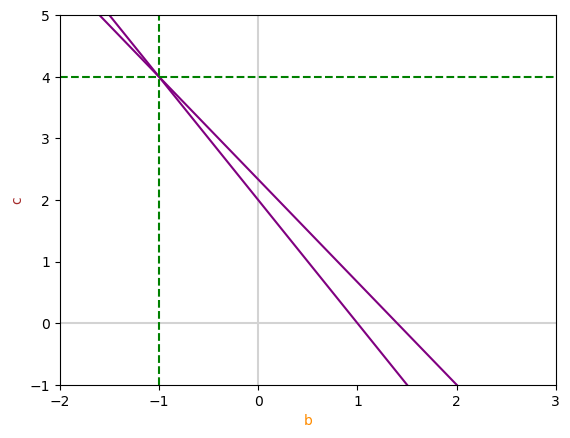

In [164]:
fig, ax = plt.subplots()
plt.xlabel('b', c='darkorange')
plt.ylabel('c', c='brown')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='purple')
ax.plot(b, c2, c='purple')
plt.axvline(x=-1, color='green', linestyle='--')
_ = plt.axhline(y=4, color='green', linestyle='--')

In PyTorch and TensorFlow:

In [165]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float type

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [166]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # also float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

**Exercises**:

1. As done with NumPy above, use PyTorch to calculate $w$ from $X$ and $y$. Subsequently, confirm that $y = Xw$.
2. Repeat again, now using TensorFlow.

**Return to slides here.**

### Matrix Inversion Where No Solution

In [167]:
X = np.array([[-4, 1], [-8, 2]])
X

array([[-4,  1],
       [-8,  2]])

In [168]:
# Uncommenting the following line results in a "singular matrix" error
# Xinv = np.linalg.inv(X)

Feel free to try inverting a non-square matrix; this will throw an error too.

**Return to slides here.**

### Orthogonal Matrices

These are the solutions to Exercises 3 and 4 on **orthogonal matrices** from the slides.

For Exercise 3, to demonstrate the matrix $I_3$ has mutually orthogonal columns, we show that the dot product of any pair of columns is zero: 

In [169]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [170]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [171]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [172]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [173]:
np.dot(column_1, column_2)

0

In [174]:
np.dot(column_1, column_3)

0

In [175]:
np.dot(column_2, column_3)

0

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm: 

In [176]:
np.linalg.norm(column_1)

1.0

In [177]:
np.linalg.norm(column_2)

1.0

In [178]:
np.linalg.norm(column_3)

1.0

Since the matrix $I_3$ has mutually orthogonal columns and each column has unit norm, the column vectors of $I_3$ are *orthonormal*. Since $I_3^T = I_3$, this means that the *rows* of $I_3$ must also be orthonormal. 

Since the columns and rows of $I_3$ are orthonormal, $I_3$ is an *orthogonal matrix*.

For Exercise 4, let's repeat the steps of Exercise 3 with matrix *K* instead of $I_3$. We could use NumPy again, but for fun I'll use PyTorch instead. (You're welcome to try it with TensorFlow if you feel so inclined.)

In [179]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [180]:
Kcol_1 = K[:,0]
Kcol_1

tensor([ 0.6667, -0.6667,  0.3333])

In [181]:
Kcol_2 = K[:,1]
Kcol_2

tensor([0.3333, 0.6667, 0.6667])

In [182]:
Kcol_3 = K[:,2]
Kcol_3

tensor([ 0.6667,  0.3333, -0.6667])

In [183]:
torch.dot(Kcol_1, Kcol_2)

tensor(0.)

In [184]:
torch.dot(Kcol_1, Kcol_3)

tensor(0.)

In [185]:
torch.dot(Kcol_2, Kcol_3)

tensor(0.)

We've now determined that the columns of $K$ are orthogonal.

In [186]:
torch.norm(Kcol_1)

tensor(1.)

In [187]:
torch.norm(Kcol_2)

tensor(1.)

In [188]:
torch.norm(Kcol_3)

tensor(1.)

We've now determined that, in addition to being orthogonal, the columns of $K$ have unit norm, therefore they are orthonormal. 

To ensure that $K$ is an orthogonal matrix, we would need to show that not only does it have orthonormal columns but it has orthonormal rows are as well. Since $K^T \neq K$, we can't prove this quite as straightforwardly as we did with $I_3$. 

One approach would be to repeat the steps we used to determine that $K$ has orthogonal columns with all of the matrix's rows (please feel free to do so). Alternatively, we can use an orthogonal matrix-specific equation from the slides, $A^TA = I$, to demonstrate that $K$ is orthogonal in a single line of code: 

In [189]:
torch.matmul(K.T, K)

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 1.0000]])

Notwithstanding rounding errors that we can safely ignore, this confirms that $K^TK = I$ and therefore $K$ is an orthogonal matrix. 